In [1]:
import pandas as pd
import zipfile
from preprocessing import Preprocess
from topicmodeling import TopicModeling
from clustering import Clusters

### Reading Data

In [4]:
zf = zipfile.ZipFile('data.zip') 
df=pd.read_csv(zf.open('corpus1_raw.csv'), sep="\t").dropna(axis=0).reset_index().iloc[:,2:]

### Preprocessing

In [5]:
a = Preprocess(df)
a.table.price = a.table.price.apply(lambda x: a.split_and_convert(x))
a.gaming_category()
a.preprocessing()

,app,description,category,price,rating,clean_text
0,Anime - Paint by Numbers,✪ New Advanced Feature: The best Paint by Numb...,ART_AND_DESIGN,0.00,4.6,feature good paint app allow create astonishin...
1,Jake Paul Wallpaper HD,New Jake Paul Wallpapers HD is an application ...,ART_AND_DESIGN,0.00,4.7,be application provide image fan application p...
2,xXxTentaction Gif Wallpapers - Anime Style,"This app contains the high-quality 4K photos, ...",ART_AND_DESIGN,0.00,4.8,app contain high quality photo gifs style such...
3,Lilo and Stitch Keyboard,Lilo and stitch keyboard is an app that has th...,ART_AND_DESIGN,0.00,3.3,stitch keyboard be app have good stitch wallpa...
4,Stephen Sharer Wallpaper HD,New Stephen Sharer Wallpapers HD is an applica...,ART_AND_DESIGN,0.00,5.0,be application provide image fan application p...
5,Cute Avatar Maker: Make Your Own Cute Avatar,Cute Avatar Maker is a new avatar making app ...,ART_AND_DESIGN,0.00,4.0,be new avatar make app create various cute chi...
6,Beautiful Colorful Flower Theme🌷,🌷We know how much you like Beautiful Colorful ...,ART_AND_DESIGN,0.00,4.8,know how much like theme beautify mobile gadge...
7,Holi Stickers 2019 for WhatsApp - WAStickerApps,Download happy holi stickers for whatsapp with...,ART_AND_DESIGN,0.00,4.2,happy holi sticker whatsapp holi sticker app h...
8,YNW Melly WallpapersHD,Are you a fans of YNW Melly ?\r\nHere we have ...,ART_AND_DESIGN,0.00,5.0,be fan melly here have nice collecion wallpape...
9,Why Don't We Wallpapers HD,Getting bored with the Same old Background pho...,ART_AND_DESIGN,0.00,4.3,get bore same old phone background style why d...


In [8]:
## statistics about preprocessing
output = a.stats_preprocessing()

Before preprocessing a description had on average 257.2 words with standard deviation 164.87. 

Moreover, the average of unique words was 157.94 and the standard deviation 87.

After preprocessing a description has on average 146.11 words with standard deviation 97.14. 
                
The average of unique words is now 89.44 and the standard deviation 49.04.


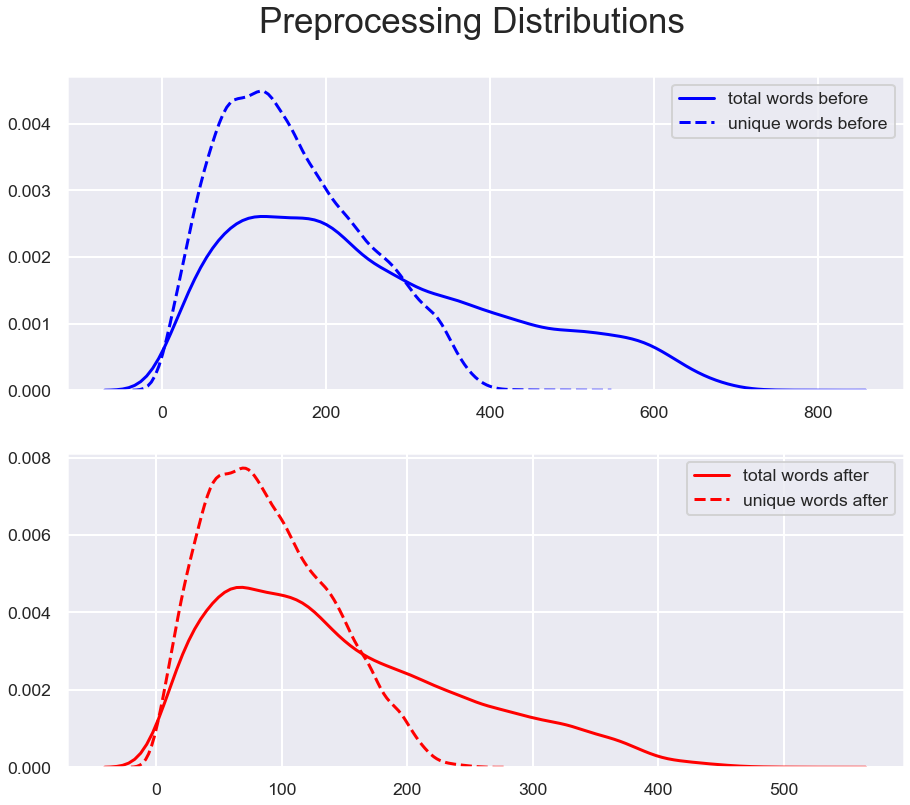

In [9]:
a.graph_statistics(output)

### Words' similarity

In [10]:
similars = a.words_similarity()

In [13]:
a.most_similar_words(similars, k=0.2, type_similarity='positive')

{'be, finance': 0.2209929,
 'app, ton': 0.20617229,
 'can, hunt': 0.22486687,
 'will, dark': 0.21002653,
 'will, mindfulness': 0.20824857,
 'more, rope': 0.21680297,
 'make, lighting': 0.20739311,
 'make, purple': 0.22695103,
 'game, maybe': 0.21033968,
 'game, historical': 0.21139975,
 'time, identify': 0.20276201,
 'time, exactly': 0.20031875,
 'photo, exposure': 0.20827016,
 'feature, pack': 0.2401332,
 'feature, night': 0.2014271,
 'do, single': 0.21610245,
 'get, guarantee': 0.21368524,
 'good, hypnosis': 0.20503075,
 'help, dinosaur': 0.20049001,
 'find, priority': 0.21461281,
 'create, subject': 0.21219452,
 'create, arrow': 0.2000696,
 'also, course': 0.21946174,
 'theme, ingredient': 0.22442964,
 'wallpaper, principle': 0.22257963,
 'weather, immerse': 0.21350248,
 'video, signature': 0.21382812,
 'video, synchronization': 0.20188105,
 'when, celebrity': 0.20747893,
 'when, shirt': 0.20026094,
 'application, core': 0.26431894,
 'just, demand': 0.21723914,
 'how, identification

### TFIDF 

In [14]:
a.tfidf_all_corpus(ngram=1, output="table").iloc[:10,]

,word,tf,idf,tfidf
0,wallpaper,9079,3.699319,149.375410
1,weather,8900,3.818875,125.950303
2,theme,9095,3.385062,100.199234
3,news,3916,3.617696,98.549575
4,keyboard,3992,4.586622,95.613398
5,music,7675,3.461402,93.001230
6,song,3358,4.100188,83.498275
7,icon,4519,3.838230,81.076011
8,photo,15486,2.963508,79.226531
9,workout,3472,4.665374,74.067553


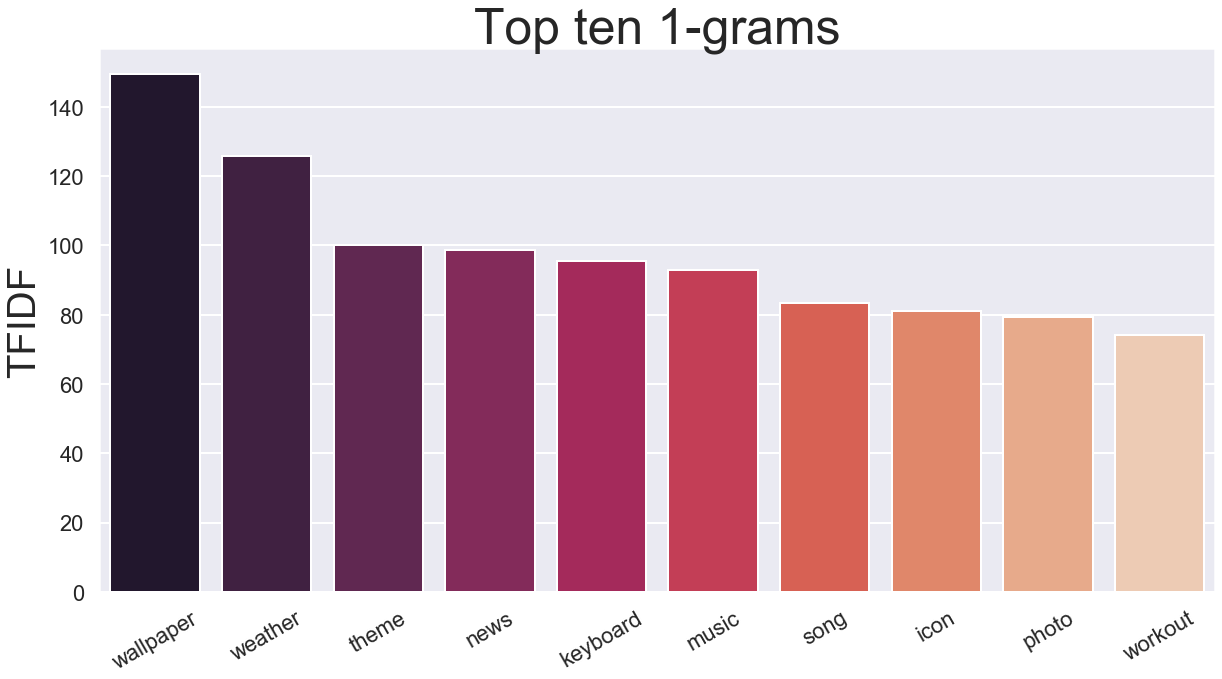

In [15]:
a.tfidf_all_corpus(ngram=1, output="graph")

Select an input among ['ART_AND_DESIGN' 'BOOKS_AND_REFERENCE' 'BUSINESS' 'COMICS' 'EDUCATION'
 'ENTERTAINMENT' 'FINANCE' 'FOOD_AND_DRINK' 'GAMING' 'HEALTH_AND_FITNESS'
 'HOUSE_AND_HOME' 'MAPS_AND_NAVIGATION' 'MEDICAL' 'MUSIC_AND_AUDIO'
 'NEWS_AND_MAGAZINES' 'PERSONALIZATION' 'PHOTOGRAPHY' 'PRODUCTIVITY'
 'SHOPPING' 'SPORTS' 'WEATHER']
SPORTS


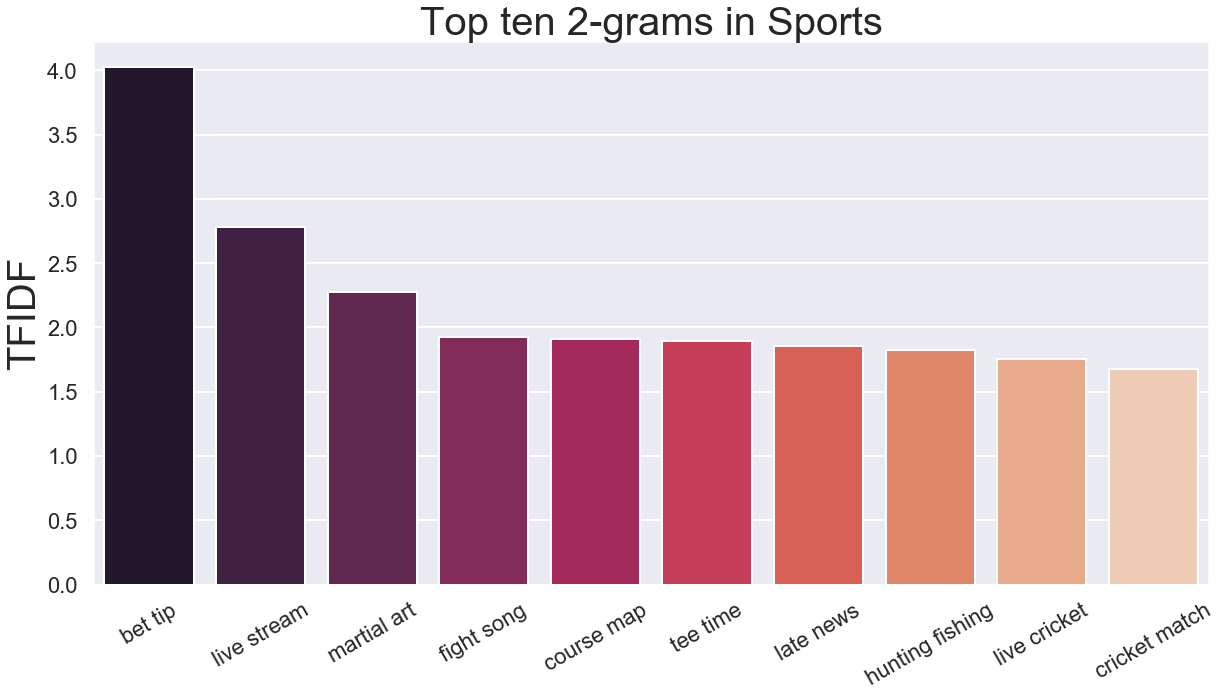

In [16]:
a.tfidf_category(ngram=2, output='graph')

### Topic Modeling (LDA)

In [17]:
topic = TopicModeling(a.table)

Dictionary is: Dictionary(13324 unique tokens: ['access', 'account', 'administrative', 'app', 'availability']...)
Dictionary after filtering: Dictionary(464 unique tokens: ['benefit', 'contain', 'depend', 'feel', 'future']...)
Prior probabilities of the topics -alpha- are: [0.3253866  0.27835052 0.39626289]
Preliminary steps to prepare the model done
Model is ready
1 "loan", "credit", "bill"
2 "collage", "selfie", "art"
3 "medical", "test", "location"
['loan, credit', 'collage, selfie', 'medical, test']
Preparing graph


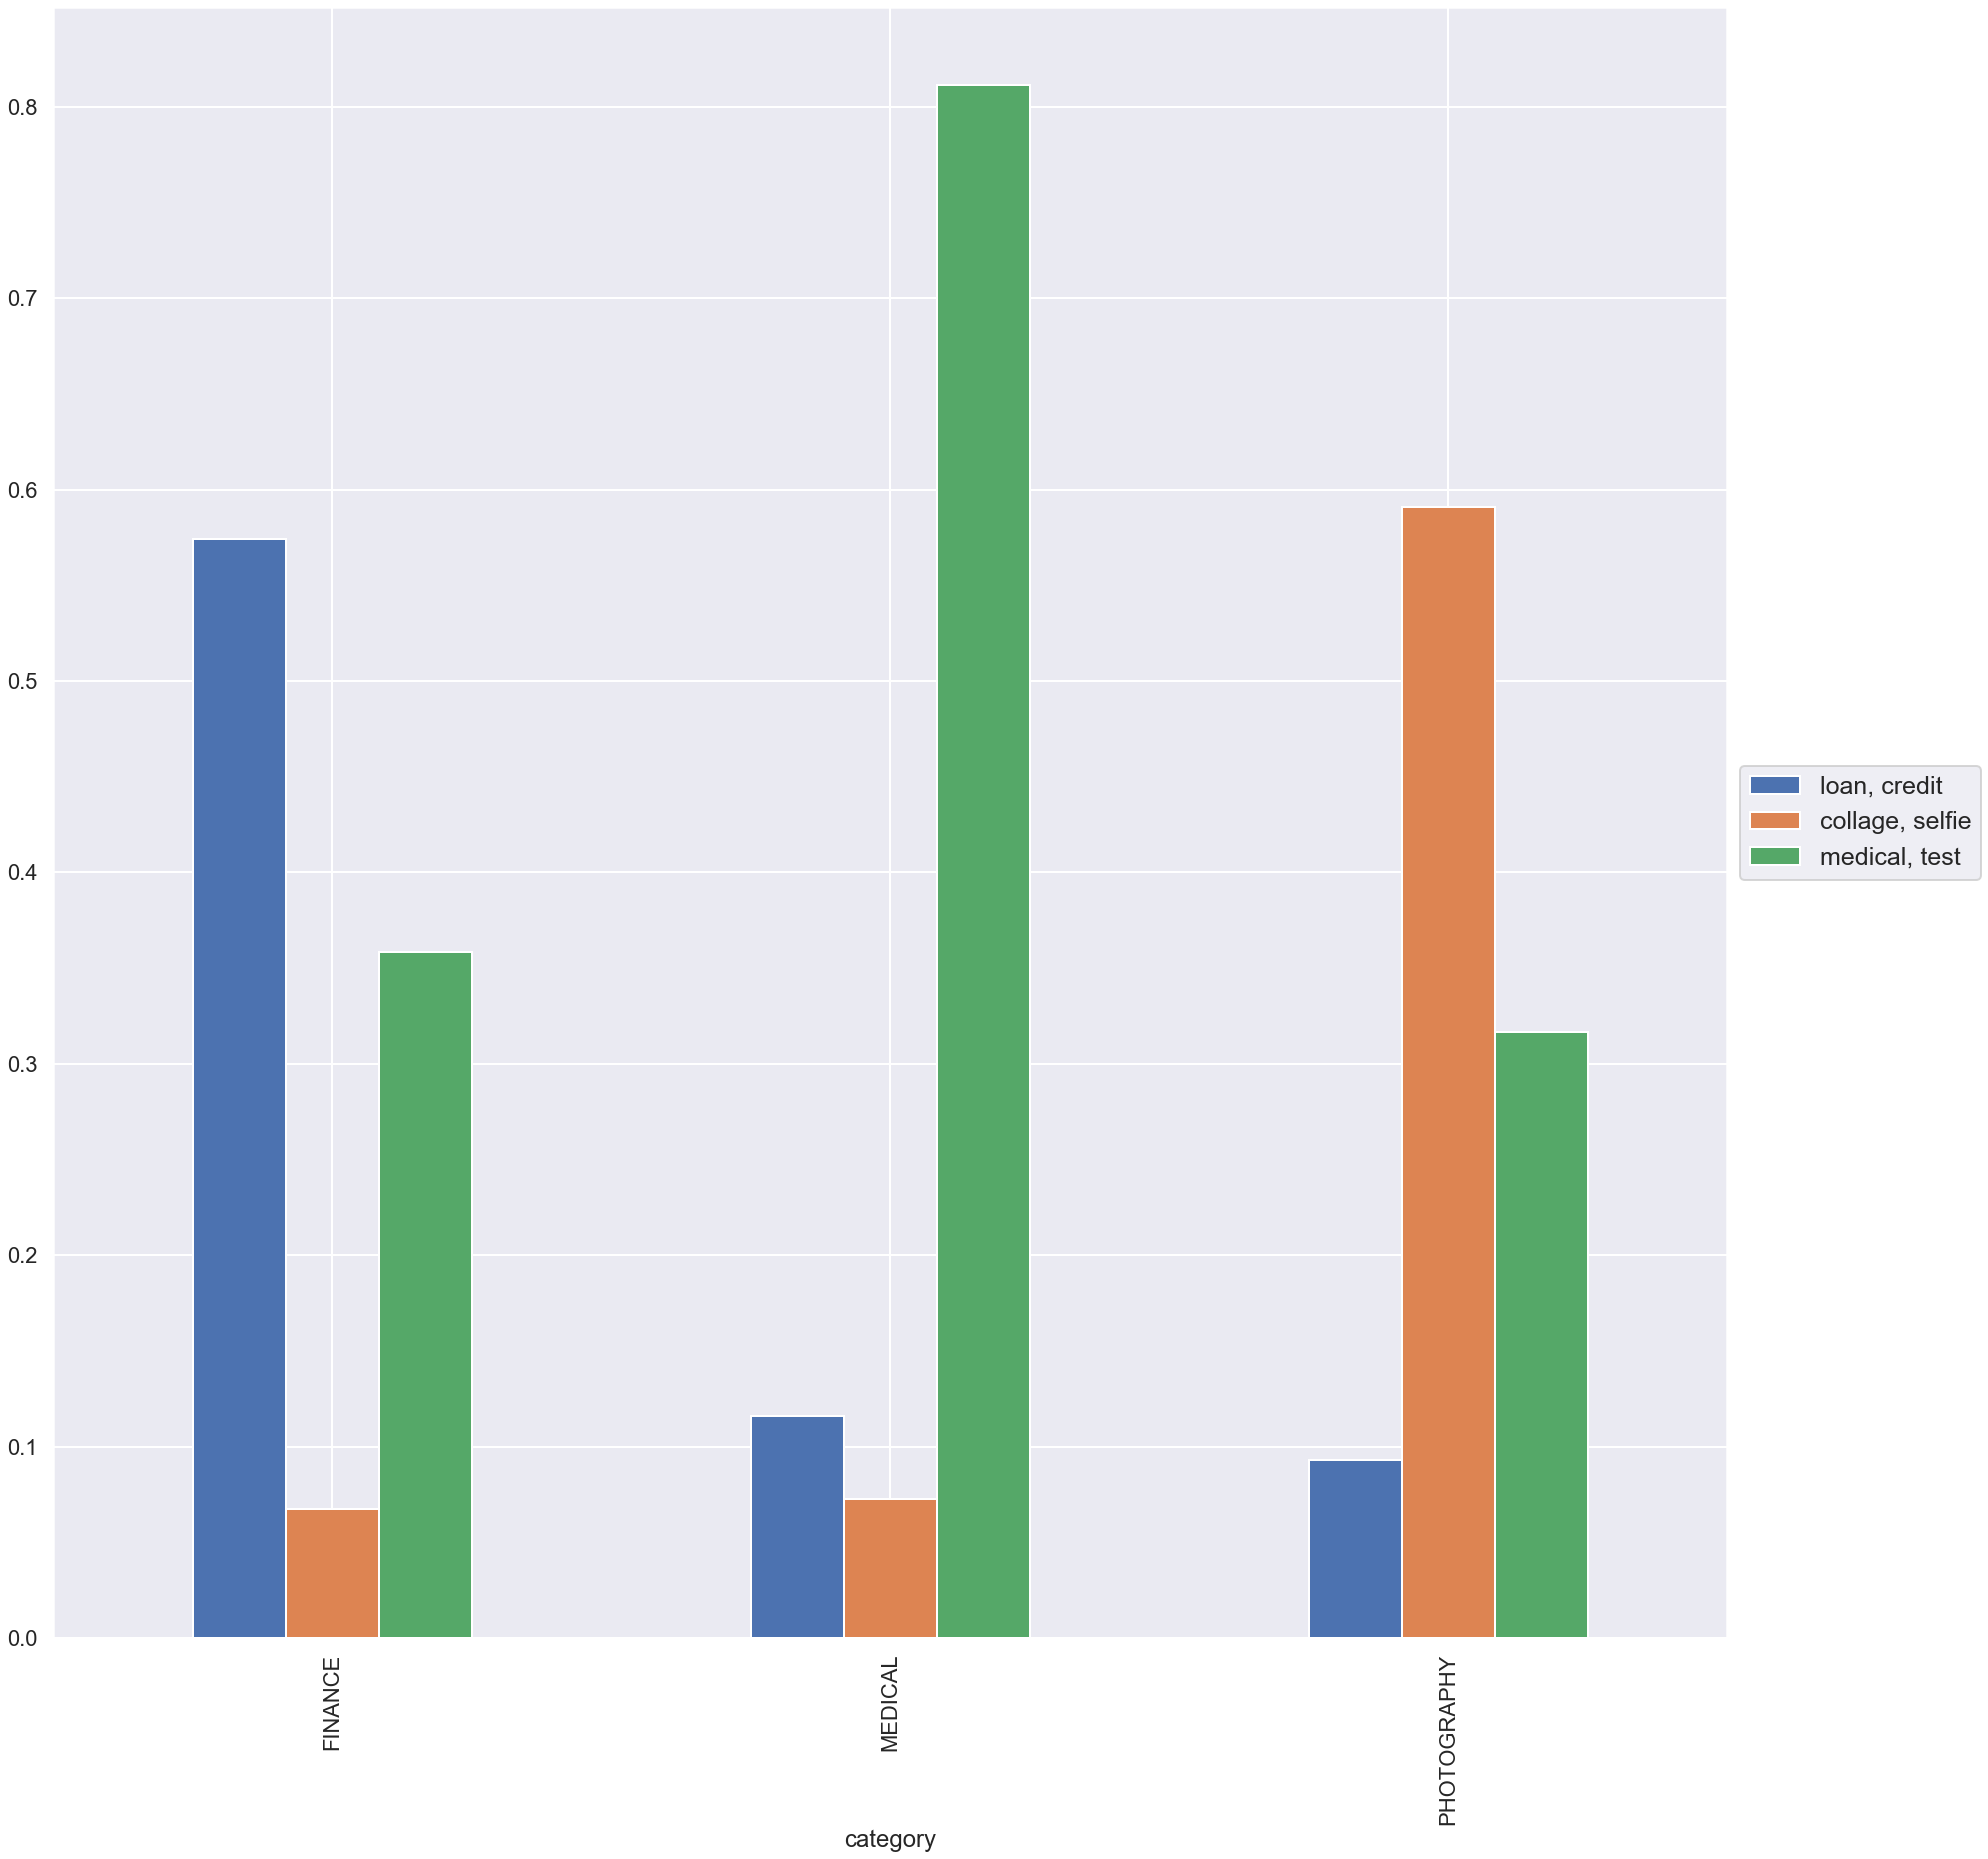

In [19]:
l=['FINANCE', 'MEDICAL', 'PHOTOGRAPHY']
topic.lda(l)

### Clustering

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

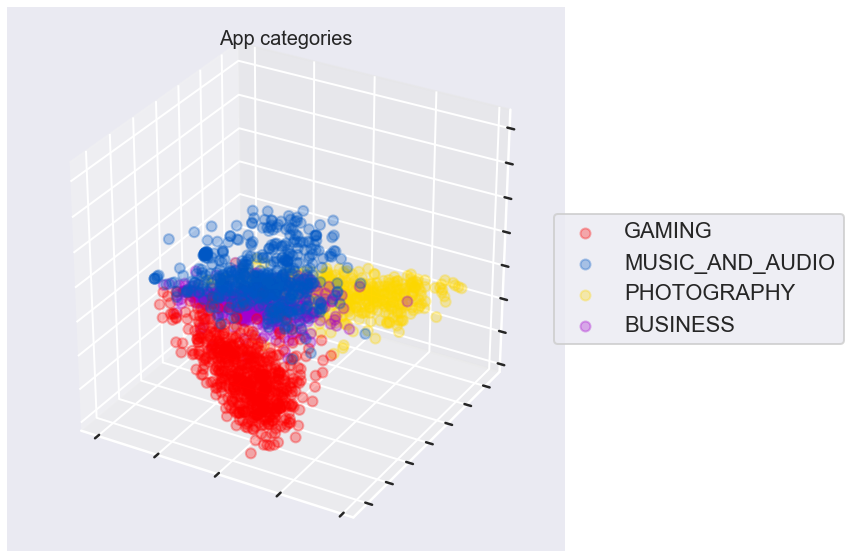

In [20]:
c = Clusters(a.table)
c.kmeans(cat_list=['BUSINESS','MUSIC_AND_AUDIO','PHOTOGRAPHY', 'GAMING'], ngram_range=3, 
         min_freq=0.005, max_freq=0.5, components=300, sample_size=2000, plot_dim=3)